In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import csv

In [50]:
dict = {
    0: "Rock",
    1: "Paper",
    2: "Scissors"
}

In [65]:
input_sequences = []
labels = []

maxlen = 70
split = 0.8

with (open("data.csv", "r")) as csvfile:
    reader = csv.reader(csvfile, delimiter='\n')
    next(reader)

    for row in reader:
        data = row[0].split(',')[2]
        data = [*data]

        data = list(map(int, data))

        for i in range(1, len(data)+1):
            input_sequences.append(data[:i+1])

In [66]:
input_sequences = keras.preprocessing.sequence.pad_sequences(input_sequences, maxlen=maxlen, padding='pre')
inputs = input_sequences[:, :-1]

labels = input_sequences[:,-1]
labels = keras.utils.to_categorical(labels - 1, num_classes=3)

In [67]:
train_size = int(split * len(inputs))
training_data, training_labels = inputs[:train_size], labels[:train_size]
test_data, test_labels = inputs[train_size:], labels[train_size:]

In [93]:
model = tf.keras.Sequential([
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(100, return_sequences=True), input_shape=(maxlen-1, 1)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(100)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [94]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [96]:
history = model.fit(training_data, training_labels, epochs=500, verbose=1, validation_data=(test_data, test_labels))

Epoch 1/500
3/3 [==============================] - 0s 111ms/step - loss: 1.0094 - accuracy: 0.5125 - val_loss: 1.2685 - val_accuracy: 0.3500
Epoch 2/500
3/3 [==============================] - 0s 58ms/step - loss: 1.0005 - accuracy: 0.5250 - val_loss: 1.2947 - val_accuracy: 0.2500
Epoch 3/500
3/3 [==============================] - 0s 60ms/step - loss: 1.0000 - accuracy: 0.5125 - val_loss: 1.3362 - val_accuracy: 0.2500
Epoch 4/500
3/3 [==============================] - 0s 52ms/step - loss: 0.9907 - accuracy: 0.5375 - val_loss: 1.3808 - val_accuracy: 0.2500
Epoch 5/500
3/3 [==============================] - 0s 62ms/step - loss: 0.9821 - accuracy: 0.5250 - val_loss: 1.4439 - val_accuracy: 0.2500
Epoch 6/500
3/3 [==============================] - 0s 59ms/step - loss: 0.9742 - accuracy: 0.5375 - val_loss: 1.3948 - val_accuracy: 0.2500
Epoch 7/500
3/3 [==============================] - 0s 67ms/step - loss: 0.9718 - accuracy: 0.5125 - val_loss: 1.4552 - val_accuracy: 0.4000
Epoch 8/500
3/3 [==

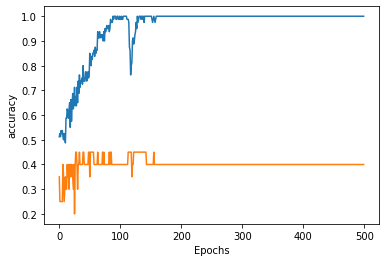

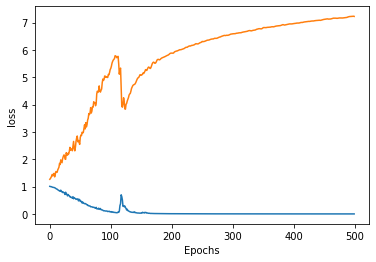

In [98]:
import matplotlib.pyplot as plt

# Plot utility
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

# Visualize the accuracy
plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')